In [277]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [278]:
X_train = np.loadtxt('train_X.csv', delimiter=',').T
Y_train = np.loadtxt('train_label.csv', delimiter=',').T

X_test = np.loadtxt('test_X.csv', delimiter=',').T
Y_test = np.loadtxt('test_label.csv', delimiter=',').T

In [279]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of Y_train: {Y_train.shape}')

print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of Y_test: {Y_test.shape}')

Shape of X_train: (784, 1000)
Shape of Y_train: (10, 1000)
Shape of X_test: (784, 350)
Shape of Y_test: (10, 350)


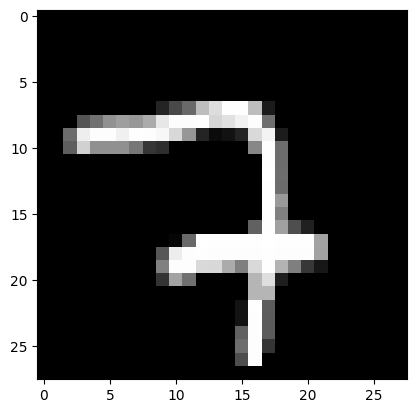

In [280]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28, 28), cmap='gray')
plt.show()

In [281]:
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(x, 0)

def softmax(x):
  expX = np.exp(x)
  return expX/np.sum(expX, axis=0)

In [282]:
def derivative_tanh(x):
  return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
  return np.array(x>0, dtype=np.float32)

In [283]:
def initialize_parameters(n_x, n_h, n_y):
  w1 = np.random.randn(n_h, n_x)*0.01
  b1 = np.zeros((n_h, 1))

  w2 = np.random.randn(n_y, n_h)*0.01
  b2 = np.zeros((n_y, 1))

  parameters = {
    'w1': w1,
    'b1': b1,
    'w2': w2,
    'b2': b2
  }

  return parameters

In [284]:
def forward_propogation(x, parameters):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  z1 = np.dot(w1, x) + b1
  a1 = relu(z1)
  
  z2 = np.dot(w2, a1) + b2
  a2 = softmax(z2)

  forward_cache ={
    'z1': z1,
    'a1': a1,
    'z2': z2,
    'a2': a2
  }

  return forward_cache

In [285]:
def cost_function(a2, y):
  m = y.shape[1]
  cost = -(1/m)*np.sum(y*np.log(a2))
  # const = -(1/m)*np.sum(y*np.log(a2, 0), 1)

  return cost

In [286]:
def back_propogation(x, y, parameters, forward_cache):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']
  
  a1 = forward_cache['a1']
  a2 = forward_cache['a2']

  m = x.shape[1]

  dz2 = (a2 - y)
  dw2 = (1/m)*np.dot(dz2, a1.T)
  db2 = (1/m)*np.sum(dz2, axis=1, keepdims= True)

  dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
  dw1 = (1/m)*np.dot(dz1, x.T)
  db1 = (1/m)*np.sum(dz1, axis=1, keepdims=True)

  gradients = {
    'dw1': dw1,
    'db1': db1,
    'dw2': dw2,
    'db2': db2
  }
  
  return gradients

In [287]:
def update_parameters(parameters, gradients, learning_rate):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  dw1 = gradients['dw1']
  db1 = gradients['db1']
  dw2 = gradients['dw2']
  db2 = gradients['db2']

  w1 = w1-learning_rate*dw1
  b1 = b1-learning_rate*db1
  w2 = w2-learning_rate*dw2
  b2 = b2-learning_rate*db2
  
  parameters = {
    'w1': w1,
    'b1': b1,
    'w2': w2,
    'b2': b2
  }
  return parameters

In [288]:
def model(x, y, n_h, learning_rate, iterations):
  n_x = x.shape[0]
  n_y = y.shape[0]

  parameters = initialize_parameters(n_x, n_h, n_y)
  cost_list = []

  for i in range(iterations):
    forward_cache = forward_propogation(x, parameters)
    cost =  cost_function(forward_cache['a2'], y)
    gradients = back_propogation(x, y, parameters, forward_cache)
    parameters = update_parameters(parameters, gradients, learning_rate)
    cost_list.append(cost)

    if(i%(iterations/10)==0):
      print(f'cost after {i} iterations: {cost}')
  
  return parameters, cost_list

In [289]:
iterations = 100
n_h = 1000
learning_rate = 0.002
Parameters, Cost_list = model(X_train, Y_train, n_h, learning_rate, iterations)

cost after 0 iterations: 8.061956766737637
cost after 10 iterations: 35.1909459779742
cost after 20 iterations: 1.1006516013057106
cost after 30 iterations: 0.7105506054572275
cost after 40 iterations: 0.7525851242840697
cost after 50 iterations: 0.39740147308882157
cost after 60 iterations: 0.17255131695322765
cost after 70 iterations: 0.09703092060310528
cost after 80 iterations: 0.05849732621965038
cost after 90 iterations: 0.027253634776814736


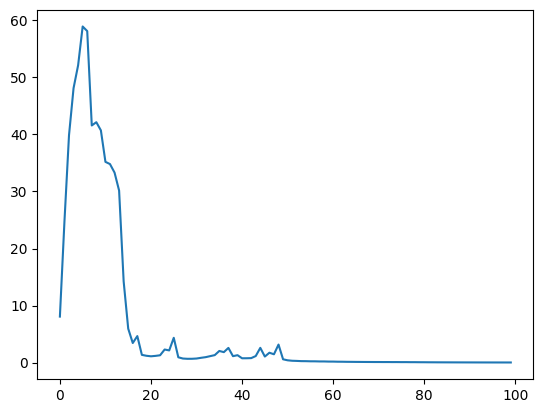

In [290]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [291]:
def accuracy(inp, labels, parameters):
  forward_cache = forward_propogation(inp, parameters)
  a_out = forward_cache['a2']

  a_out = np.argmax(a_out, 0)
  y_out = np.argmax(labels, 0)

  acc = np.mean(a_out==y_out)*100
  return acc

In [292]:
print("Accuracy of training dataset: ", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of testing dataset:", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of training dataset:  99.9 %
Accuracy of testing dataset: 86.86 %
